<a href="https://colab.research.google.com/github/kushum-coder/2501460_kushum/blob/main/Worksheet6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# ========== PART I - TASK 1 ==========
# Softmax Function

import numpy as np

def softmax(z):
    exp = np.exp(z - np.max(z))
    return exp / np.sum(exp)

# Test
print("Softmax Test:", softmax(np.array([2.0, 1.0, 0.1])))


Softmax Test: [0.65900114 0.24243297 0.09856589]


In [3]:
# ========== PART I - TASK 2 ==========
# Categorical Log Loss

def categorical_log_loss(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred + 1e-9))

# Test
y_true = np.array([1, 0, 0])
y_pred = softmax(np.array([2.0, 1.0, 0.1]))
print("Categorical Log Loss Test:", categorical_log_loss(y_true, y_pred))


Categorical Log Loss Test: 0.4170300147603855


In [5]:
# ========== PART I - TASK 3 ==========
# Cost Function for dataset

def cost_function(Y_true, Y_pred):
    m = Y_true.shape[0]
    return -np.sum(Y_true * np.log(Y_pred + 1e-9)) / m


In [6]:
# ========== PART I - TASK 4 ==========
# Compute Gradient

def compute_gradient(X, Y_true, Y_pred):
    m = X.shape[0]
    return np.dot(X.T, (Y_pred - Y_true)) / m


In [7]:
# ========== PART I - TASK 4.2 ==========
# Gradient Descent Optimization

def gradient_descent(X, Y_true, lr=0.1, iterations=1000):
    np.random.seed(42)
    W = np.random.randn(X.shape[1], Y_true.shape[1])
    costs = []

    for i in range(iterations):
        Z = np.dot(X, W)
        Y_pred = softmax(Z.T).T
        cost = cost_function(Y_true, Y_pred)
        costs.append(cost)

        grad = compute_gradient(X, Y_true, Y_pred)
        W -= lr * grad

    return W, costs

print("PART I DONE ✔")


PART I DONE ✔


In [8]:
# ========== PART II - Step 1 ==========
# Load dataset & preprocess

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target.reshape(-1,1)

encoder = OneHotEncoder(sparse_output=False)
Y = encoder.fit_transform(y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Dataset Ready ✔")


Dataset Ready ✔


In [10]:
# ========== PART II - Step 2 ==========
# Softmax & Training function

def softmax_reg(Z):
    exp = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    return exp / np.sum(exp, axis=1, keepdims=True)

def train_softmax(X, Y, lr=0.05, epochs=1000):
    np.random.seed(42)
    W = np.random.randn(X.shape[1], Y.shape[1])
    cost_list=[]

    for i in range(epochs):
        Z = np.dot(X, W)
        Y_pred = softmax_reg(Z)

        cost = -np.mean(np.sum(Y * np.log(Y_pred + 1e-8), axis=1))
        cost_list.append(cost)

        grad = np.dot(X.T,(Y_pred-Y))/X.shape[0]
        W -= lr * grad

    return W, cost_list


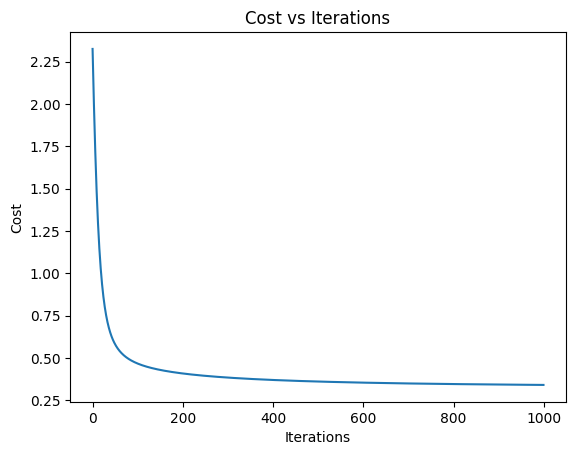

Training Complete ✔


In [11]:
# ========== PART II - Step 3 ==========
# Train model & plot cost

import matplotlib.pyplot as plt

W, cost_history = train_softmax(X_train, Y_train)

plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations")
plt.show()

print("Training Complete ✔")


In [12]:
# ========== PART II - Step 4 ==========
# Prediction + Evaluation metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def predict(X, W):
    prob = softmax_reg(np.dot(X, W))
    return np.argmax(prob, axis=1)

y_pred = predict(X_test, W)
y_true = np.argmax(Y_test, axis=1)

print("\nModel Performance:")
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred, average='macro'))
print("Recall:", recall_score(y_true, y_pred, average='macro'))
print("F1 Score:", f1_score(y_true, y_pred, average='macro'))

print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))

print("\nPART II DONE ✔")



Model Performance:
Accuracy: 0.9
Precision: 0.9285714285714285
Recall: 0.8888888888888888
F1 Score: 0.8933333333333334

Confusion Matrix:
 [[10  0  0]
 [ 0  6  3]
 [ 0  0 11]]

PART II DONE ✔
